In [1]:
import numpy as np
import os, sys
sys.path.append('../')
from src.datasets.soccernet_generic_wcombined import soccernet_dataset_generic
from src.datasets.soccernet_generic_full_games import soccernet_dataset_generic as full_d
from src.utils.helper import samples_by_language
import src.utils.training_helper as training_helper
import torch
from torch.utils.data import Dataset, DataLoader

/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [2]:
root_dir = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/"
train_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Train_300.npy"
valid_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Valid_100.npy"
test_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Test_100.npy"


In [3]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%bash
nvidia-smi

Tue Dec 15 11:29:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.165.02   Driver Version: 418.165.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM3...  On   | 00000000:E5:00.0 Off |                    0 |
| N/A   51C    P0    53W / 350W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
langpath_valid = '/work/oarongve/project-daredevil/project-daredevil/language-annotations/annotations/valid_lang_dict.json'
samples_valid_all = samples_by_language(langpath_valid,valid_list,'all')



In [6]:
valid_set_all = soccernet_dataset_generic(npy_file=valid_list,root_dir=root_dir,lang='all',lang_dict=langpath_valid)


In [7]:
w = 8

In [8]:
import matplotlib.pyplot as plt

In [23]:
valid_set_all.load_waves()

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


In [24]:
valid_set_all.generate_mel_spectrograms(load_features=True)

100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


In [25]:
valid_set_all.load_resnet_features()

100%|██████████| 100/100 [00:02<00:00, 35.90it/s]


In [26]:
valid_set_all.load_combined()

100%|██████████| 100/100 [00:02<00:00, 37.49it/s]


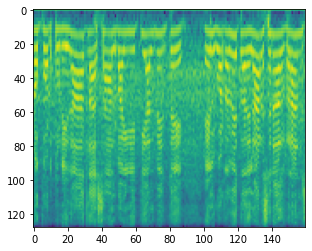

In [13]:
plt.imshow(valid_set_all[0]['ms_spot'])

TypeError: float() argument must be a string or a number, not 'dict'

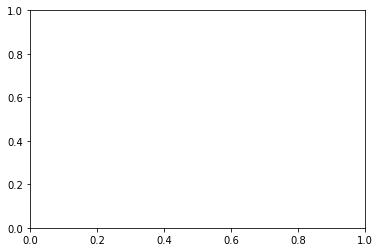

In [14]:
plt.plot(valid_set_all[0])

In [20]:
valid_set_all.load_waves()

100%|██████████| 100/100 [00:28<00:00,  3.56it/s]


In [16]:
valid_set_full = full_d(npy_file=valid_list,root_dir=root_dir,lang='all',lang_dict=langpath_valid)

In [17]:
valid_set_full.load_resnet_features()

100%|██████████| 100/100 [00:02<00:00, 34.60it/s]


In [18]:
valid_set_full.load_waves()

100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


In [28]:
valid_set_full.generate_mel_spectrograms(load_features=True)

100%|██████████| 100/100 [00:09<00:00, 10.76it/s]


In [29]:
valid_set_full[0]

{'vidpath': 'england_epl/2014-2015/2015-04-11 - 19-30 Burnley 0 - 1 Arsenal',
 'duration:': 2700,
 'half': 1,
 'wave': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'ms': tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [ -9.6036,  -1.7227,  -3.2105,  ...,  -4.8553,  -4.4477,  -2.6305],
         [-10.1187,  -2.2377,  -3.7255,  ...,  -5.3703,  -4.9627,  -3.1455],
         ...,
         [ -8.4097,  -2.9803,  -4.0725,  ...,  -4.3589,  -4.7831,  -5.9633],
         [ -8.4248,  -3.1495,  -4.4920,  ...,  -4.7145,  -5.4459,  -7.7210],
         [ -9.1707,  -5.5728,  -5.5775,  ...,  -6.4781,  -6.5831,  -8.6311]]),
 'resnet_features': array([[ 10.419873  , -12.299298  ,   0.24465992, ...,  -0.4906878 ,
           0.1594942 ,   0.18948315],
        [  7.0868654 , -16.873007  ,   0.76492053, ...,  -0.27542874,
          -0.0625417 ,   0.6625206 ],
        [  0.26830408, -21.526619  ,  -1.0437597 , ...,   0.41995054,
           0.7700767 ,  -0.14332128],
 

# Wave

In [31]:
'gameTime': '1 - 11:02'

SyntaxError: illegal target for annotation (<ipython-input-31-cdfadc39dc46>, line 1)

In [32]:
wave = valid_set_full[0]['wave']

In [33]:
ms = valid_set_full[0]['ms']

In [34]:
(11*60)+2

662

In [35]:
event = 662
wave_idx = (662 * 16000)

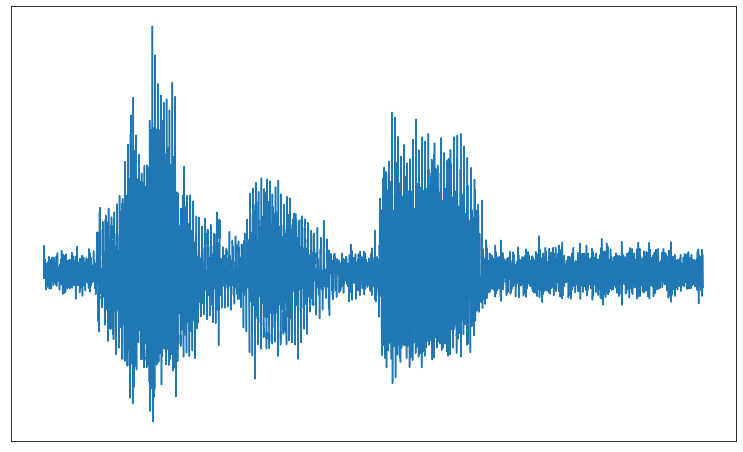

In [69]:

plt.figure(figsize=(13,8))
plt.plot(wave[wave_idx-8000:wave_idx+8000])
plt.xticks([])
plt.yticks([])
plt.savefig("wave_visualized.png",bbox_inches='tight', pad_inches=0)
plt.show()


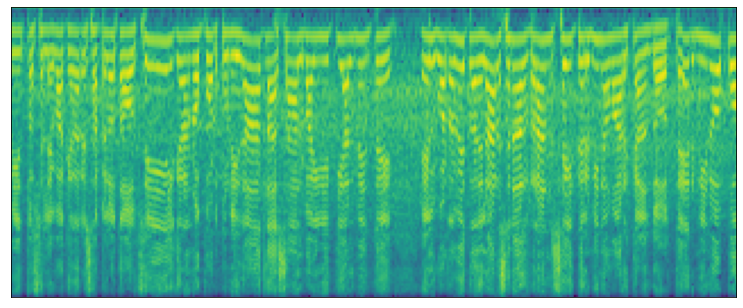

In [70]:
plt.figure(figsize=(13,8))
plt.imshow(ms[:,(662*40)-160:(662*40)+160])
plt.xticks([])
plt.yticks([])
plt.savefig("melspectrogram_visualized.png",bbox_inches='tight', pad_inches=0)
plt.show()


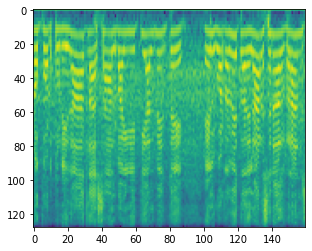

In [39]:
wave.shape

(43200768,)